### Q1 Occupations

Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called users<br>
Step 4. Discover what is the mean age per occupation<br>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least<br>
Step 6. For each occupation, calculate the minimum and maximum ages<br>
Step 7. For each combination of occupation and sex, calculate the mean age<br>
Step 8. For each occupation present the percentage of women and men<br>

#### Step1

In [126]:
import numpy as np
import pandas as pd

#### Step2,3

In [127]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",delimiter='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### Step4

In [128]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step5

In [129]:
num_of_male = users[users['gender'] == 'M']
male = num_of_male.groupby(['occupation','gender'])['occupation'].count()
total = users.groupby('occupation')['gender'].count()
male_ratio = male/total*100
male_ratio = male_ratio.sort_values(ascending=False)
male_ratio

occupation     gender
doctor         M         100.000000
engineer       M          97.014925
technician     M          96.296296
retired        M          92.857143
programmer     M          90.909091
executive      M          90.625000
scientist      M          90.322581
entertainment  M          88.888889
lawyer         M          83.333333
salesman       M          75.000000
educator       M          72.631579
student        M          69.387755
other          M          65.714286
marketing      M          61.538462
writer         M          57.777778
none           M          55.555556
administrator  M          54.430380
artist         M          53.571429
librarian      M          43.137255
healthcare     M          31.250000
homemaker      M          14.285714
dtype: float64

#### Step6

In [24]:
users.groupby(['occupation']).agg({'age':[np.min,np.max]})

age     
              amin amax
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60

#### Step8

In [130]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

#### Step8

In [30]:
percent_of_each_gender_in_occ = users.groupby('occupation')['gender'].value_counts(normalize=True)*100

percent_of_each_gender_in_occ

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

### Q2 Euro Teams

Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called euro12<br>
Step 4. Select only the Goal column<br>
Step 5. How many team participated in the Euro2012?<br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline<br>
Step 8. Sort the teams by Red Cards, then to Yellow Cards<br>
Step 9. Calculate the mean Yellow Cards given per Team<br>
Step 10. Filter teams that scored more than 6 goals<br>
Step 11. Select the teams that start with G<br>
Step 12. Select the first 7 columns<br>
Step 13. Select all columns except the last 3<br>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia<br>

#### Step1

In [131]:
import pandas as pd
import numpy as np

#### Step2,3

In [132]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Step4

In [42]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### Step5

In [48]:
Numof_Teams_Participated= euro12.Team.nunique()
Numof_Teams_Participated

16

#### Step6

In [51]:
Numof_Columns=euro12.shape[1]
Numof_Columns

35

#### Step7

In [53]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Step8

In [54]:
euro12[['Team', 'Red Cards', 'Yellow Cards']].sort_values(by=['Red Cards','Yellow Cards'])

,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9


#### Step9

In [134]:
euro12["Yellow Cards"].mean()

7.4375

#### Step10

In [56]:
euro12[['Team','Goals']].loc[euro12['Goals'] > 6 ]

,Team,Goals
5,Germany,10
13,Spain,12


#### Step11

In [60]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step12

In [67]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Step13

In [68]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step14

In [76]:
shootingaccuracy=euro12[euro12['Team'].isin(['Russia', 'Italy','England'])]
shootingaccuracy[['Shooting Accuracy','Team']]

,Shooting Accuracy,Team
3,50.0%,England
7,43.0%,Italy
12,22.5%,Russia


### Q3 Housing

Step 1. Import the necessary libraries<br>
Step 2. Create 3 differents Series, each of length 100, as follows:
  - The first a random number from 1 to 4<br>
  - The second a random number from 1 to 3<br>
  - The third a random number from 10,000 to 30,000<br>

Step 3. Create a DataFrame by joinning the Series by column<br>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter<br>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'<br>
Step 6. Ops it seems it is going only until index 99. Is it true?<br>
Step 7. Reindex the DataFrame so it goes from 0 to 299

#### Step1

In [100]:
import pandas as pd
import numpy as np

#### Step2.1

In [81]:
a=np.random.randint(1, 5, 100)
a

array([4, 2, 3, 1, 1, 1, 4, 4, 2, 3, 3, 2, 1, 1, 3, 2, 3, 3, 2, 4, 1, 1,
       2, 2, 3, 2, 1, 3, 1, 4, 3, 3, 4, 4, 1, 1, 4, 3, 4, 1, 4, 3, 1, 4,
       2, 4, 1, 3, 1, 4, 2, 2, 1, 1, 1, 4, 2, 4, 4, 4, 4, 3, 4, 4, 1, 4,
       4, 1, 1, 1, 4, 4, 4, 3, 4, 4, 3, 1, 4, 4, 2, 3, 1, 4, 3, 3, 4, 4,
       2, 4, 1, 4, 4, 3, 4, 2, 2, 3, 3, 4])

#### Step2.2

In [82]:
b=np.random.randint(1, 3, 100)
b

array([1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1])

#### Step2.3

In [84]:
c=np.random.randint(10000, 30001, 100)
c

array([10032, 16555, 25315, 10203, 17651, 20369, 12873, 19255, 12680,
       24256, 27460, 21939, 29829, 19602, 29440, 14749, 27311, 18395,
       21965, 19816, 17054, 21247, 16927, 10705, 27067, 27615, 26099,
       19755, 25815, 24668, 29960, 19150, 27334, 18497, 24274, 24389,
       26438, 26869, 12677, 10978, 15052, 27205, 22616, 18444, 24602,
       23350, 23284, 16813, 17031, 21530, 15531, 18551, 23147, 29314,
       13408, 18559, 18914, 22822, 27666, 25525, 14019, 21418, 21743,
       21285, 15426, 20052, 20966, 11642, 11744, 22209, 23485, 18189,
       29680, 21895, 17424, 27712, 24229, 16739, 21670, 19464, 29368,
       17836, 21186, 19288, 26541, 24496, 15380, 16342, 10329, 27506,
       16042, 26883, 23529, 25967, 10593, 23702, 22902, 29883, 13309,
       19007])

#### Step3

In [103]:
dataframe=pd.DataFrame({'a':a, 'b':b, 'c':c})
dataframe

,a,b,c
0,4,1,10032
1,2,1,16555
2,3,1,25315
3,1,2,10203
4,1,2,17651
...,...,...,...
95,2,1,23702
96,2,1,22902
97,3,2,29883
98,3,1,13309


#### Step4

In [105]:
dataframe.rename({'a':'bedrs', 'b':'bathrs', 'c':'price_sqr_meter'}, axis='columns')

,bedrs,bathrs,price_sqr_meter
0,4,1,10032
1,2,1,16555
2,3,1,25315
3,1,2,10203
4,1,2,17651
...,...,...,...
95,2,1,23702
96,2,1,22902
97,3,2,29883
98,3,1,13309


#### Step5

In [114]:
bigcolumn = dataframe['bedrs'].astype(str) + dataframe['bathrs'].astype(str) + dataframe['price_sqr_meter'].astype(str)

bigcolumn

0     4110032
1     2116555
2     3125315
3     1210203
4     1217651
       ...   
95    2123702
96    2122902
97    3229883
98    3113309
99    4119007
Length: 100, dtype: object

#### Step6

In [ ]:
Yes, the index is going till 99

#### Step7

In [115]:
bigcolumn.reindex(range(0, 300))

0      4110032
1      2116555
2      3125315
3      1210203
4      1217651
        ...   
295        NaN
296        NaN
297        NaN
298        NaN
299        NaN
Length: 300, dtype: object

### Q4 Wind Statistics 

The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from the attached file wind.txt<br>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.<br>
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.<br>
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].<br>
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.<br>
Step 7. Compute how many non-missing values there are in total.<br>
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.<br>
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.<br>
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.<br>
Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.<br>
Step 12. Downsample the record to a yearly frequency for each location.<br>
Step 13. Downsample the record to a monthly frequency for each location.<br>
Step 14. Downsample the record to a weekly frequency for each location.<br>
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.<br>

#### Step1

In [140]:
import pandas as pd
import numpy as np

#### Step2,3

In [141]:
data = pd.read_csv("wind.data",sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [142]:
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [80]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


#### Step4

In [143]:
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

In [144]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


#### Step5

In [145]:
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

#### Step6

In [148]:
data1= data.isnull().sum()
data1

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [151]:
data = data1.dropna()

### step7

In [149]:
nonmissed=data.count()
nonmissed.sum()

78857

#### step8

In [86]:
data.mean().mean()

10.222465245951712

#### step9

In [87]:
Min=data.min()
Max=data.max()
Mean=data.mean()
Std=data.std()
var=[Min,Max,Mean,Std]
in_dex=["Min","Max","Mean","Std"]
loc_stats= pd.DataFrame(var,in_dex)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
Std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


### step10

In [88]:
Min=data.min()
Max=data.max()
Mean=data.mean()
Std=data.std()
var=[Min,Max,Mean,Std]
in_dex=["Min","Max","Mean","Std"]
day_stats= pd.DataFrame(var,in_dex)
day_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
Std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


### step11

In [89]:
windspeed = data[data.index.month == 1]

windspeed.mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

### step12

In [90]:
data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### step13

In [91]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### step14

In [92]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### step15

In [105]:
windspeed_stats = data.resample('W').agg(['min','max','mean','std'])

windspeed_stats.loc[windspeed_stats.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  17.75  12.100000  4.893064   3.42  14.37   9.500000   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  20.79  14.846667   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  14.956667  5.525210  11.63  20.17  15.008333   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  11.824000  1.071742   8.83  17.00  12.956000   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.195000   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Date                                ...                                      
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  4.070420   7.29  17.33  ...   6.693333  3.203652   6.50  15.92   
1961-01-29  4.242125  12.67  25.84  ...  14.921667  3.494638  14.04  26.08   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.908818   6.13  19.41  ...  13.521667  2.772287  14.09  28.62   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  3.490319   8.17  13.67  ...  12.068000  1.729775  11.58  23.45   
1961-03-12  3.359302   7.54  15.50  ...   9.570000  3.065864  10.21  22.71   
1961-03-19  2.352867   5.25  13.96  ...  11.627143  3.099472  11.29  22.79   

                                   MAL                              
                 mean       std    min    max       mean       std  
Date                                                                
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.993333  3.941358   6.79  16.08  10.346667  3.407132  
1961-01-29  19.800000  4.675044  17.50  27.63  22.388333  4.224639  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  19.756667  5.021524  10.96  22.58  15.925000  4.763632  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.174000  5.058249   8.83  17.54  14.108000  3.350772  
1961-03-12  16.068333  4.408144   5.54  18.16  13.066667  4.956336  
1961-03-19  19.350000  3.779727  11.34  22.95  16.227143  4.331958  

[10 rows x 48 columns]

### Q5

Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address.<br>
Step 3. Assign it to a variable called chipo.<br>
Step 4. See the first 10 entries<br>
Step 5. What is the number of observations in the dataset?<br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. Print the name of all the columns.<br>
Step 8. How is the dataset indexed?<br>
Step 9. Which was the most-ordered item?<br>
Step 10. For the most-ordered item, how many items were ordered?<br>
Step 11. What was the most ordered item in the choice_description column?<br>
Step 12. How many items were orderd in total?<br>
Step 13.<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Turn the item price into a float<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Check the item price type<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Create a lambda function and change the type of item price<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Check the item price type<br>
Step 14. How much was the revenue for the period in the dataset?<br>
Step 15. How many orders were made in the period?<br>
Step 16. What is the average revenue amount per order?<br>
Step 17. How many different items are sold?<br>

### Step1

In [106]:
import pandas as pd

### Step2,3

In [118]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step4

In [109]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step5

In [115]:
print(f"num_of_observations={chipo.shape[0]}")

num_of_observations=4622


### Step6

In [116]:
print(f"num_of_columns={len(chipo.columns)}")

num_of_columns=5


### Step7

In [117]:
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


### Step8

In [118]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step9

In [125]:
Most_Ordered_item=chipo.groupby('item_name').sum()
Most_Ordered_item=Most_Ordered_item.sort_values(by=['quantity'], ascending = False).head(1)
Most_Ordered_item

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step10

In [126]:
Most_Ordered_item[['quantity']]

,quantity
item_name,
Chicken Bowl,761


### Step11

In [128]:
choic_desc = chipo.groupby(['choice_description']).sum()
choic_desc=choic_desc.sort_values('quantity', ascending=False).head(1)
choic_desc

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step12

In [129]:
print(f'Total orders = {chipo.quantity.sum()}')

Total orders = 4972


In [119]:
def convert_to_float(num):
    return float(num[1:-1])

### Step13.1

In [121]:
chipo.item_price.dtype

dtype('O')

### Step13.2

In [122]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### Step13.3

In [123]:
chipo.dtypes.item_price

dtype('float64')

### Step14

In [155]:
chipo['Revenue'] = chipo['quantity']*chipo.item_price
totalRevenue = chipo.Revenue.sum()
totalRevenue

39237.02

### Step15

In [139]:
chipo.order_id.value_counts().count()

1834

### Step16

In [156]:
chipo.groupby(by=['order_id']).sum().mean()['Revenue']

21.394231188658654

### Step17

In [157]:
chipo.item_name.nunique()

50

### Q6

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


<Figure size 432x288 with 0 Axes>

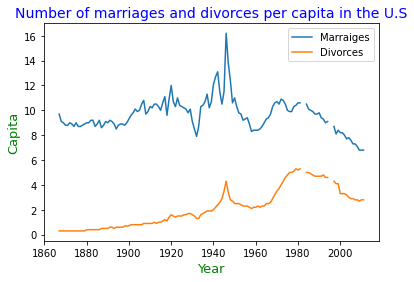

In [15]:
plt.figure()
df.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
plt.bar_label(hbars, fmt='%.2f')
plt.set_xlim(right=15)
plt.title('Number of marriages and divorces per capita in the U.S', color = 'Blue', fontsize = 14)
plt.xlabel('Year', color = 'Green', fontsize = 13)
plt.ylabel('Capita', color = 'Green', fontsize = 13)
plt.show()

### Q7

In [17]:
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data = df.loc[df.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
data

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


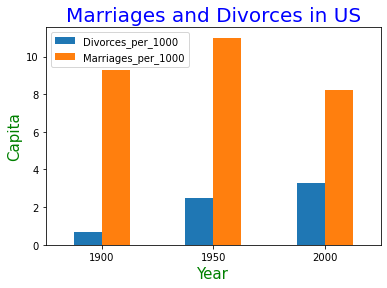

In [28]:
data[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces in US", color = 'Blue', fontsize = 20)
plt.xlabel('Year', color = 'Green', fontsize = 15)
plt.ylabel('Capita', color = 'Green', fontsize = 15)
plt.xticks(positions, labels, rotation = 0)
positions = (0,1,2)
labels = ("1900", "1950", "2000")

### Q8

In [32]:
df = pd.read_csv('actor_kill_counts.csv')
data = df.sort_values("Count", ascending = True)

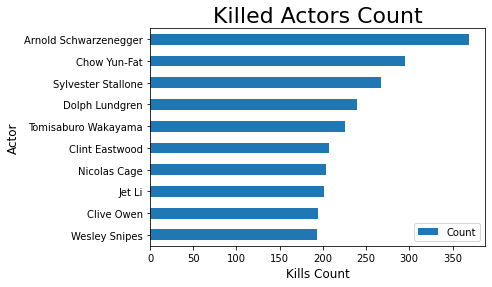

In [64]:
data.plot.barh(x='Actor', y='Count')

plt.title('Killed Actors Count', fontsize=22)

plt.xlabel('Kills Count', color = 'k', fontsize =12 )
plt.ylabel('Actor', color = 'k', fontsize = 12)
plt.show()

### Q9

In [65]:
df = pd.read_csv('roman-emperor-reigns.csv')
df

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


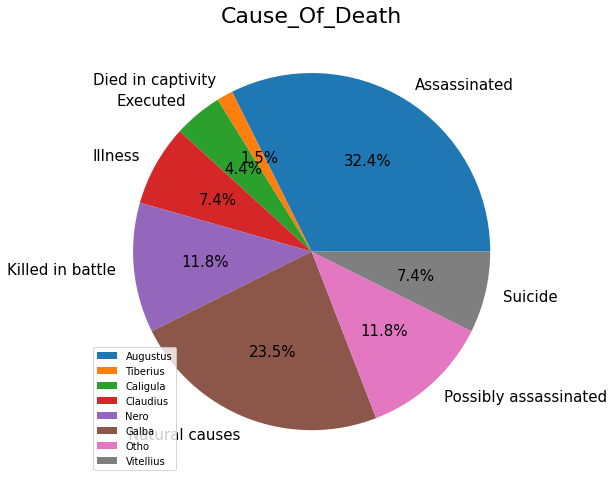

In [88]:
newdata = df.groupby("Cause_of_Death")['Emperor'].count()
newdata.plot.pie(figsize = (8,81) , fontsize = 15, ylabel = '', autopct='%1.1f%%')
plt.title('Cause_Of_Death', fontsize=22)
plt.legend(df["Emperor"], loc = "lower left")

#### 32.4% Emperors were Assasinated

### Q10

In [93]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Doctarates VS Arcade Revenure in US')

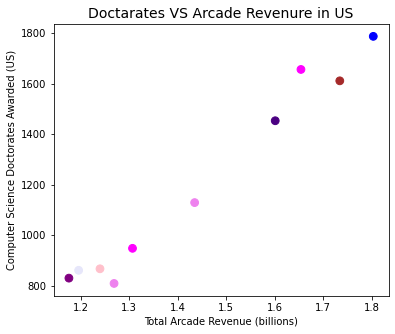

In [117]:
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
data.head()

data.plot.scatter(x='Total Arcade Revenue (billions)',
                  y='Computer Science Doctorates Awarded (US)', 
                  c = ['Lavender','Purple','Violet','pink','magenta','violet','indigo','magenta','blue',"brown"] ,
                  s = 60, 
                  figsize = (6,5))
plt.title('Doctarates VS Arcade Revenure in US', fontsize=14)